In [1]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import explained_variance_score


# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

Select a dataset with a continuous target variable.

Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [2]:
df = wrangle.new_zillow_data()

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,9.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
2,0.0,0.0,73026.0,1434941.0,1959.0,20800.37,6037.0
3,0.0,0.0,5068.0,1174475.0,1948.0,14557.57,6037.0
4,0.0,0.0,1776.0,440101.0,1947.0,5725.17,6037.0


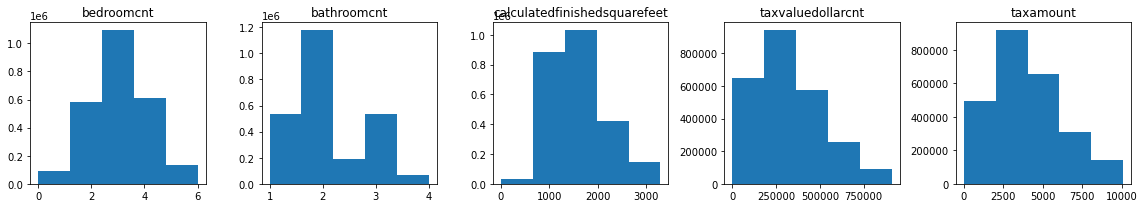

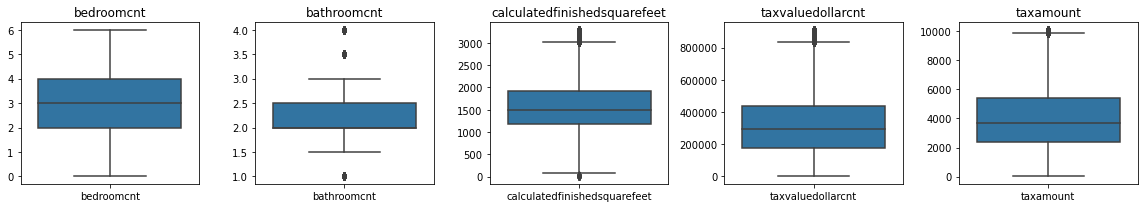

In [4]:
# here is where I clean, prep and split my df
train, validate, test = wrangle.prepare_zillow(df)

In [12]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test, df

In [15]:
df.isnull().sum()

bedroomcnt                       2945
bathroomcnt                      2957
calculatedfinishedsquarefeet    45097
taxvaluedollarcnt               34266
yearbuilt                       47833
taxamount                       22752
fips                             2932
dtype: int64

In [16]:
train.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
fips                            0
dtype: int64

In [17]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['taxvaluedollarcnt'])
y_train = train.taxvaluedollarcnt

X_validate = validate.drop(columns=['taxvaluedollarcnt'])
y_validate = validate.taxvaluedollarcnt

X_test = test.drop(columns=['taxvaluedollarcnt'])
y_test = test.taxvaluedollarcnt

In [18]:
# let's check out X
X_train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,fips
359618,2.0,2.0,1271.0,1982.0,6037.0
2364888,4.0,3.0,2671.0,1964.0,6037.0
261280,4.0,3.0,2076.0,1939.0,6037.0
1758266,1.0,1.0,682.0,1974.0,6059.0
798177,3.0,1.0,1178.0,1950.0,6037.0


In [19]:
# target variable/y
# This helps us determine which type of algorithm we may want to use.

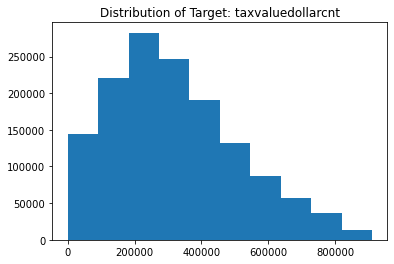

In [28]:
# let's determine distribution
plt.hist(y_train)
plt.title('Distribution of Target: taxvaluedollarcnt')
plt.show()

In [29]:
# Modeling

In [30]:
# creating a baseline model

# Before we begin making models, we need to know how well we can estimate (predict) the taxvaluedollarcnt 
# (taxvaluedollarcnt) without using any features. This is often done by predicting every observation's 
# target value to be the mean or the median. E.g. we could predict every houses' taxvaluedollarcnt
# to be the mean taxvaluedollarcnt of all the houses in our training sample. We will try 
# both the mean and the median, see which performs best, and set that evaluation metric value 
# as our baseline performance to beat.

In [34]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict taxvaluedollarcnt_pred_mean
taxvaluedollarcnt_pred_mean = y_train['taxvaluedollarcnt'].mean()
y_train['taxvaluedollarcnt_pred_mean'] = taxvaluedollarcnt_pred_mean
y_validate['taxvaluedollarcnt_pred_mean'] = taxvaluedollarcnt_pred_mean

# 2. compute taxvaluedollarcnt_pred_median
taxvaluedollarcnt_pred_median = y_train['taxvaluedollarcnt'].median()
y_train['taxvaluedollarcnt_pred_median'] = taxvaluedollarcnt_pred_median
y_validate['taxvaluedollarcnt_pred_median'] = taxvaluedollarcnt_pred_median

# 3. RMSE of taxvaluedollarcnt_pred_mean
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of taxvaluedollarcnt_pred_median
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.# create the metric_df as a blank dataframe
metric_df = pd.DataFrame()
# # make our first entry into the metric_df with median baseline
# metric_df = make_metric_df(y_train.taxvaluedollarcnt,y_train.taxvaluedollarcnt_pred_median,'median_baseline',metric_df)_pred_median)**(1/2)
# rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_median)**(1/2)

# create the metric_df as a blank dataframe
metric_df = pd.DataFrame()
# make our first entry into the metric_df with median baseline
metric_df = make_metric_df(y_train.,
                           y_train.taxvaluedollarcnt_pred_median,
                           'median_baseline',
                          metric_df)
                                
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

SyntaxError: invalid syntax (<ipython-input-34-2695e99915c3>, line 30)

In [ ]:
# we will incrementally build 
# a dataframe for comparison of 
# our metrics for model selection
# for ease of reflection

In [ ]:
# create the metric_df as a blank dataframe
metric_df = pd.DataFrame()
# make our first entry into the metric_df with median baseline
metric_df = make_metric_df(y_train.taxvaluedollarcnt,
                           y_train.taxvaluedollarcnt_pred_median,
                           'median_baseline',
                          metric_df)

In [ ]:
metric_df

In [ ]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.taxvaluedollarcnt, color='blue', alpha=.5, label="Actual Taxvaluedollarcnt")
plt.hist(y_train.taxvaluedollarcnt_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Taxvaluedollarcnt - Mean")
plt.hist(y_train.taxvaluedollarcnt_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted Taxvaluedollarcnt - Median")
plt.xlabel("Taxvaluedollarcnt (taxvaluedollarcnt)")
plt.ylabel("Number of Houses")
plt.legend()
plt.show()

In [ ]:
# LinearRegression (OLS)
# Fit the model using X_train_scaled and the labels from y_train.
# Predict final grade for students in training sample using our model (lm).
# Evaluate using RMSE
# Repeat predictions and evaluation for validation.
# Compare RMSE train vs. validation. Overfitting?

In [ ]:
y_train.head()

In [ ]:
# create the model object

lm = LinearRegression(normalize=True)

In [ ]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
# 
# fit the thing
# 
lm.fit(X_train, y_train.taxvaluedollarcnt)

In [ ]:
# predict train

y_train['taxvaluedollarcnt_pred_lm'] = lm.predict(X_train)

In [ ]:
# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm) ** (1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)